In [1]:
%pip install numpy
%pip install matplotlib
%pip install pandas 
%pip install seaborn
%pip install kagglehub
%pip install tensorflow
%pip install tensorflow-datasets
%pip install jinja2
%pip install opencv-python



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import matplotlib.pyplot as mplt
import pandas as pd
import seaborn as sns
import kagglehub
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2



c:\Users\sasup\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
datos, metadatos = tfds.load('Oxford_iiit_pet',as_supervised = True, with_info =True)

## EDA  ~ Dataset Exploration

### Structure

In [3]:
metadatos

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/4.0.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scale, pose and
    lighting. All images have an associated ground truth annotation of breed and
    species. Additionally, head bounding boxes are provided for the training split,
    allowing using this dataset for simple object detection tasks. In the test
    split, the bounding boxes are empty.
    """,
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    data_dir='C:\\Users\\sasup\\tensorflow_datasets\\oxford_iiit_pet\\4.0.0',
    file_format=tfrecord,
    download_size=773.52 MiB,
    dataset_size=773.68 MiB,
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=string),
        'head_bbox': BBoxFeature(shape=(4,), dtype=float32),
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'la

In [4]:
metadatos.features


FeaturesDict({
    'file_name': Text(shape=(), dtype=string),
    'head_bbox': BBoxFeature(shape=(4,), dtype=float32),
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=37),
    'segmentation_mask': Image(shape=(None, None, 1), dtype=uint8),
    'species': ClassLabel(shape=(), dtype=int64, num_classes=2),
})

In [5]:
metadatos.splits


{'train': <SplitInfo num_examples=3680, num_shards=4>,
 'test': <SplitInfo num_examples=3669, num_shards=4>}

In [6]:
num_clases = metadatos.features['label'].num_classes
print(num_clases)


37


image  label
0  [[[3, 3, 3], [5, 3, 4], [7, 5, 6], [4, 2, 3], ...     33
1  [[[5, 9, 8], [3, 4, 0], [11, 24, 4], [36, 51, ...     12
2  [[[44, 32, 6], [44, 34, 7], [44, 34, 7], [41, ...      9
3  [[[108, 130, 117], [114, 133, 127], [108, 128,...     32
4  [[[237, 228, 91], [236, 228, 93], [230, 225, 8...     33
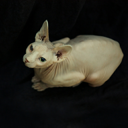
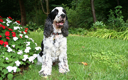
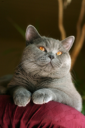
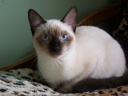
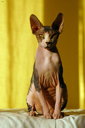

In [7]:
tfds.as_dataframe(datos['train'].take(5),metadatos)


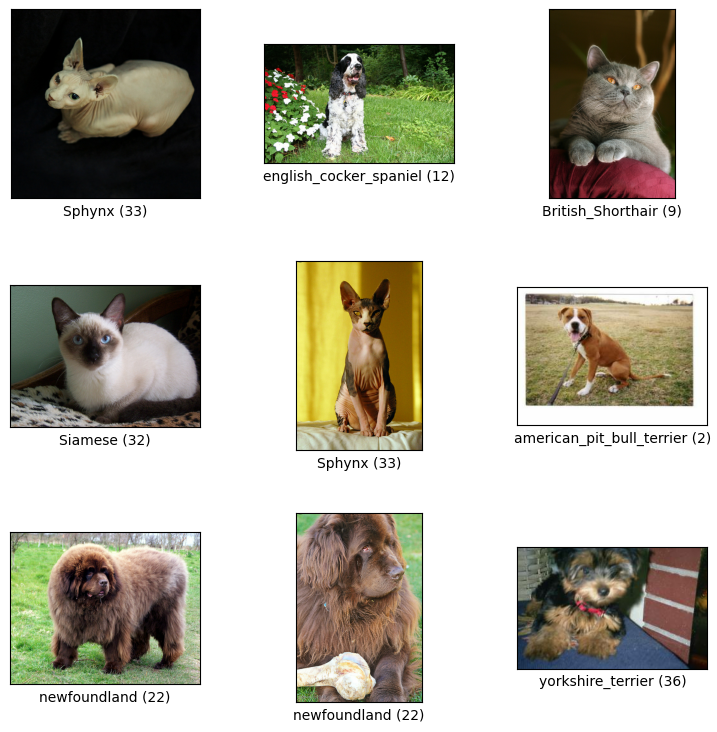

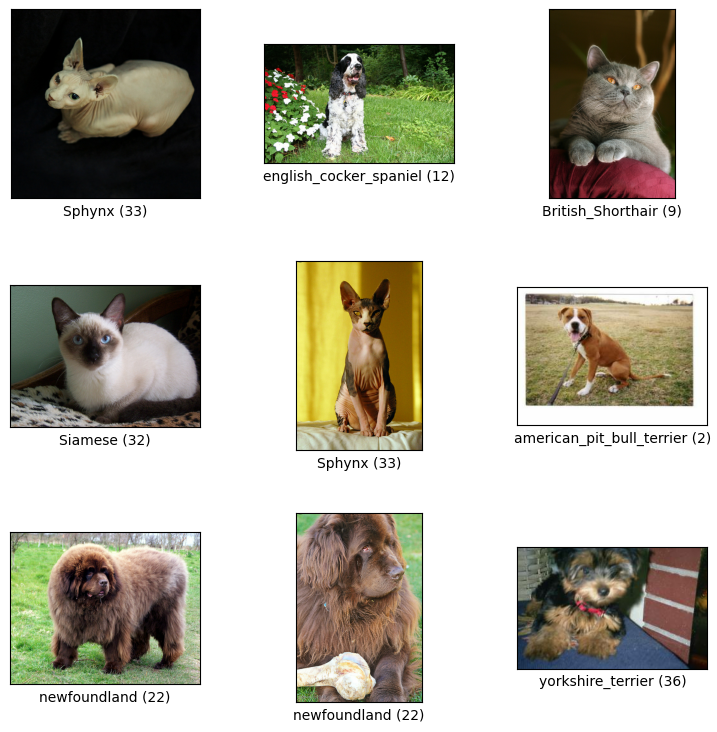

In [8]:
tfds.show_examples(
    datos['train'],
    metadatos,
    image_key='image',
    label_key='label'
)


In [8]:
t = 150

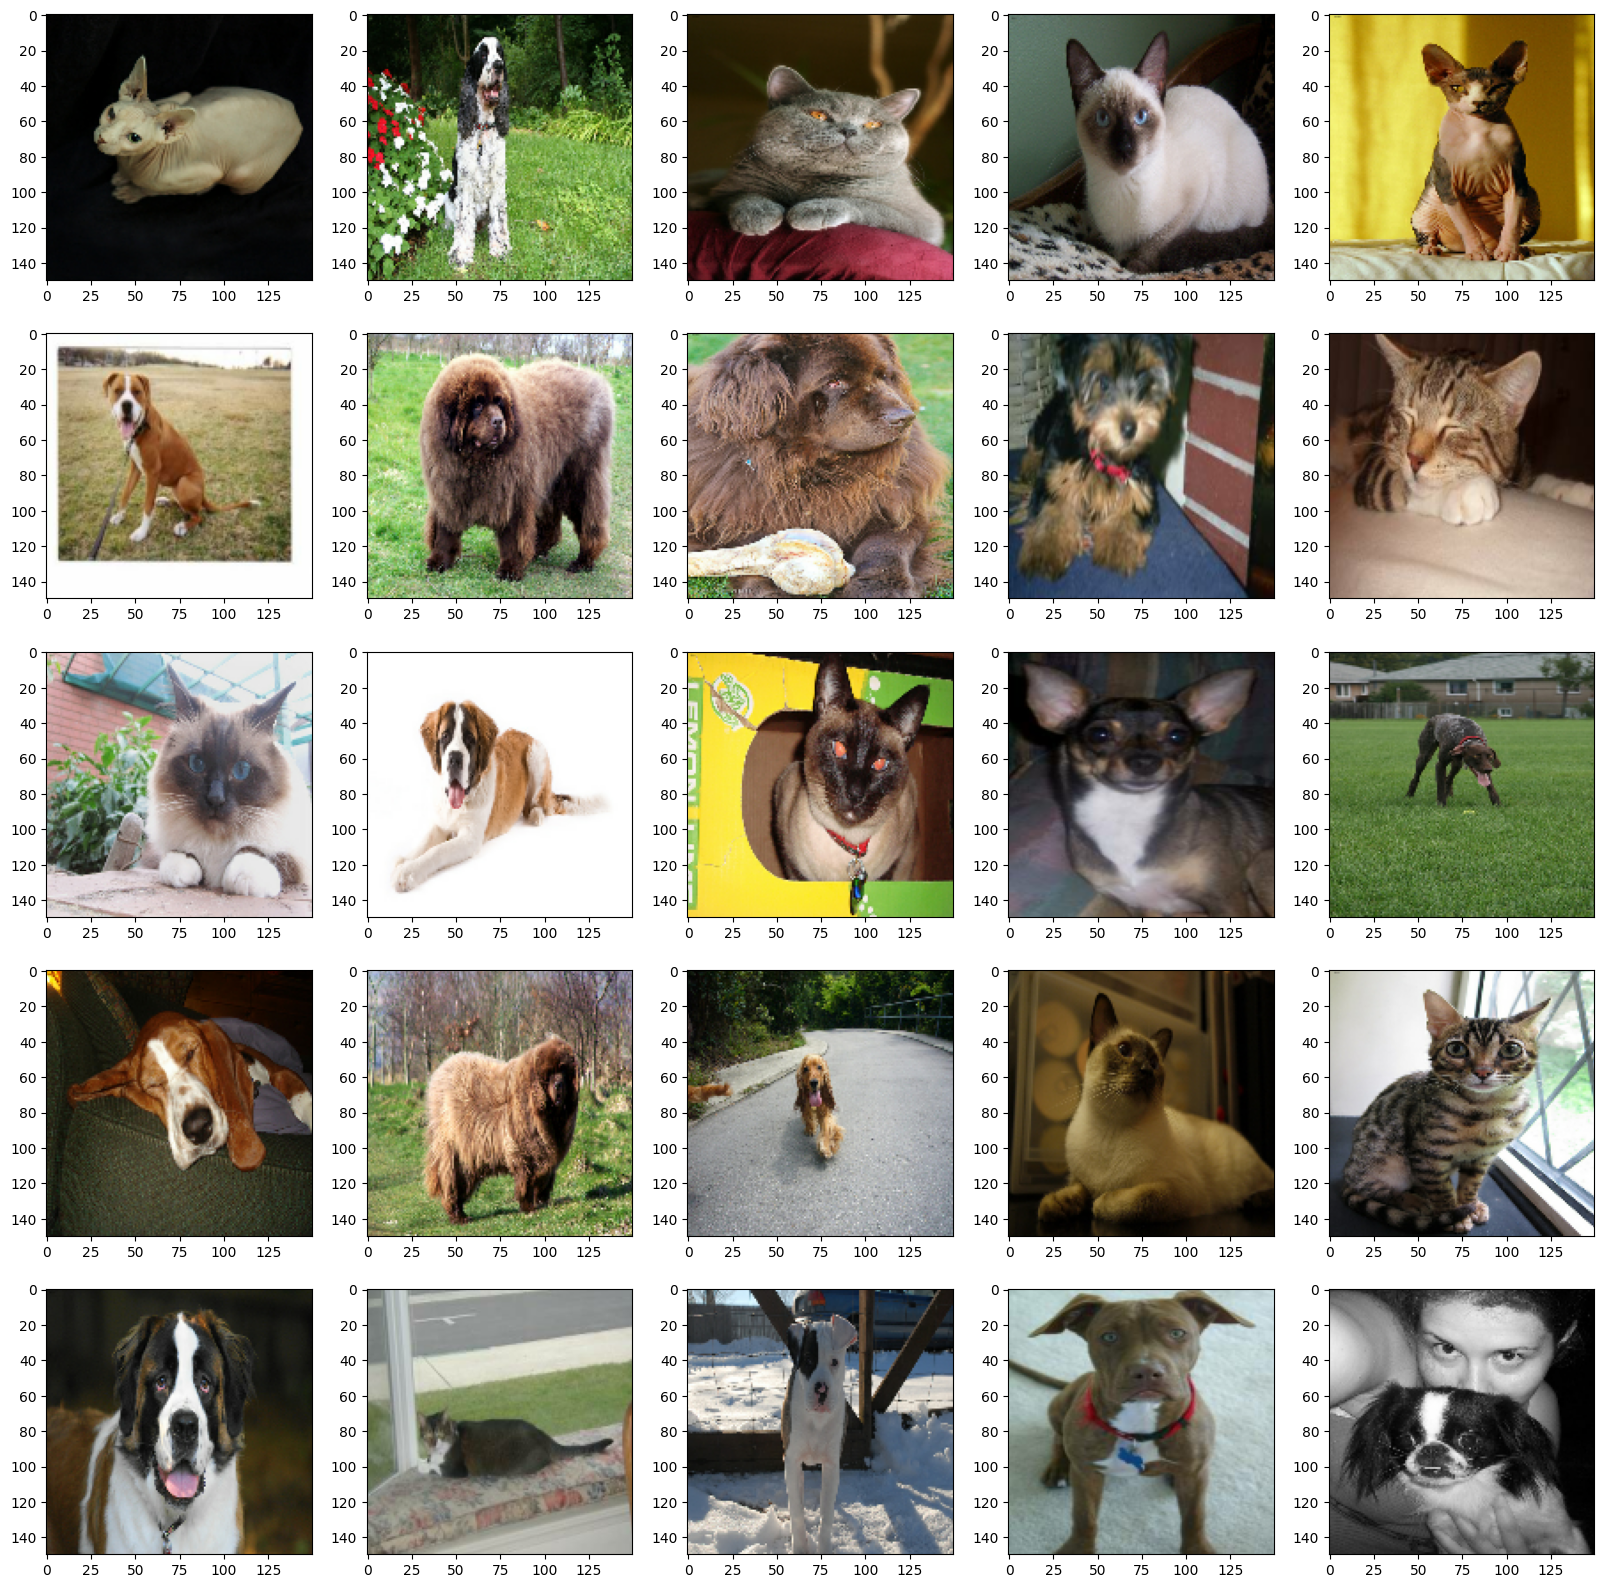

In [10]:
mplt.figure(figsize=(20,20))
for i,(imagen, etiqueta) in enumerate(datos['train'].take(25)):
    imagen = cv2.resize(imagen.numpy(),(t,t))
    mplt.subplot(5,5,i+1)
    mplt.imshow(imagen)

## Reorder Dataset

### Combine the default train and test splits (50-50)

In [9]:
dTrain = datos['train']
dTest = datos['test']

data = dTrain.concatenate(dTest)

total = metadatos.splits['train'].num_examples + metadatos.splits['test'].num_examples 
print("Ttotal de datos :",total )

Ttotal de datos : 7349


### Shuffle to avoid grouped classes

In [66]:
data = data.shuffle(buffer_size= total ,seed = 42)


### Split the dataset

It is split into:
- 70% Training
- 15% Testing
- 15% Validation

In [67]:
entrenamiento_ds = data.take(int(0.7*total))
test_ds = data.skip(int(0.7*total)).take(int(0.15*total))
validacion_ds = data.skip(int(0.85*total)).take(int(0.15*total))

### Visualize class distribution

Since we want to use `sns`, the labels are first converted to their numeric values so they can be turned into a pandas DataFrame, with a `label` column and one row per label.

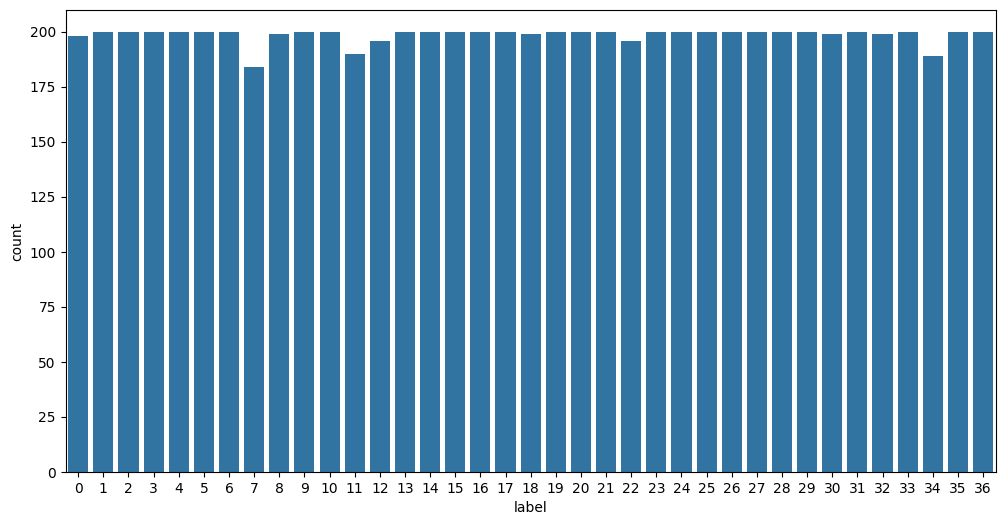

label
29    200
25    200
35    200
19    200
1     200
5     200
6     200
16    200
2     200
27    200
14    200
26    200
21    200
23    200
4     200
24    200
13    200
17    200
33    200
28    200
20    200
15    200
3     200
31    200
9     200
10    200
36    200
8     199
18    199
30    199
32    199
0     198
22    196
12    196
11    190
34    189
7     184
Name: count, dtype: int64

In [14]:
etiqueta = []

for img,label in data:
    etiqueta.append(label.numpy())


mplt.figure(figsize=(12, 6))

df = pd.DataFrame({'label': etiqueta})

sns.countplot(data=df, x='label')

mplt.show()

df['label'].value_counts()



### Dataset transformation

- Normalize pixels to 0-1
- Use one_hot to keep labels as vectors
- Resize each image to a square of size t
- Keep the image in RGB (t, t, 3)

In [68]:

def transformacionIMG(imagen,label):
    imagen = tf.image.resize(imagen, [t, t])
    #imagen = tf.reshape(imagen, [t, t, 3])
    imagen = imagen / 255.0
    label = tf.cast(label, tf.int32)
    label = tf.one_hot(label,num_clases)
    return imagen, label


In [69]:
entrenamiento_ds = entrenamiento_ds.map(transformacionIMG)
test_ds = test_ds.map(transformacionIMG)
validacion_ds = validacion_ds.map(transformacionIMG)

#### Data augmentation

**Using numpy arrays**

In [ ]:
numpyy = False

if(numpyy):
    entrenamiento_ds = entrenamiento_ds.map(transformacionIMG).batch(32).prefetch(tf.data.AUTOTUNE)
    test_ds = test_ds.map(transformacionIMG).batch(32).prefetch(tf.data.AUTOTUNE)
    validacion_ds = validacion_ds.map(transformacionIMG).batch(32).prefetch(tf.data.AUTOTUNE)



In [ ]:
if(numpyy):
    x_list = []
    y_list = []

    for x_batch, y_batch in entrenamiento_ds:
        x_list.append(x_batch.numpy())
        y_list.append(y_batch.numpy())

    x_train = np.vstack(x_list)  
    y_train = np.vstack(y_list)



- rotate the image up to 50 degrees
- shift horizontally up to 20%
- shift vertically up to 10%
- apply random zoom
- flip horizontally
- how to fill newly created pixels


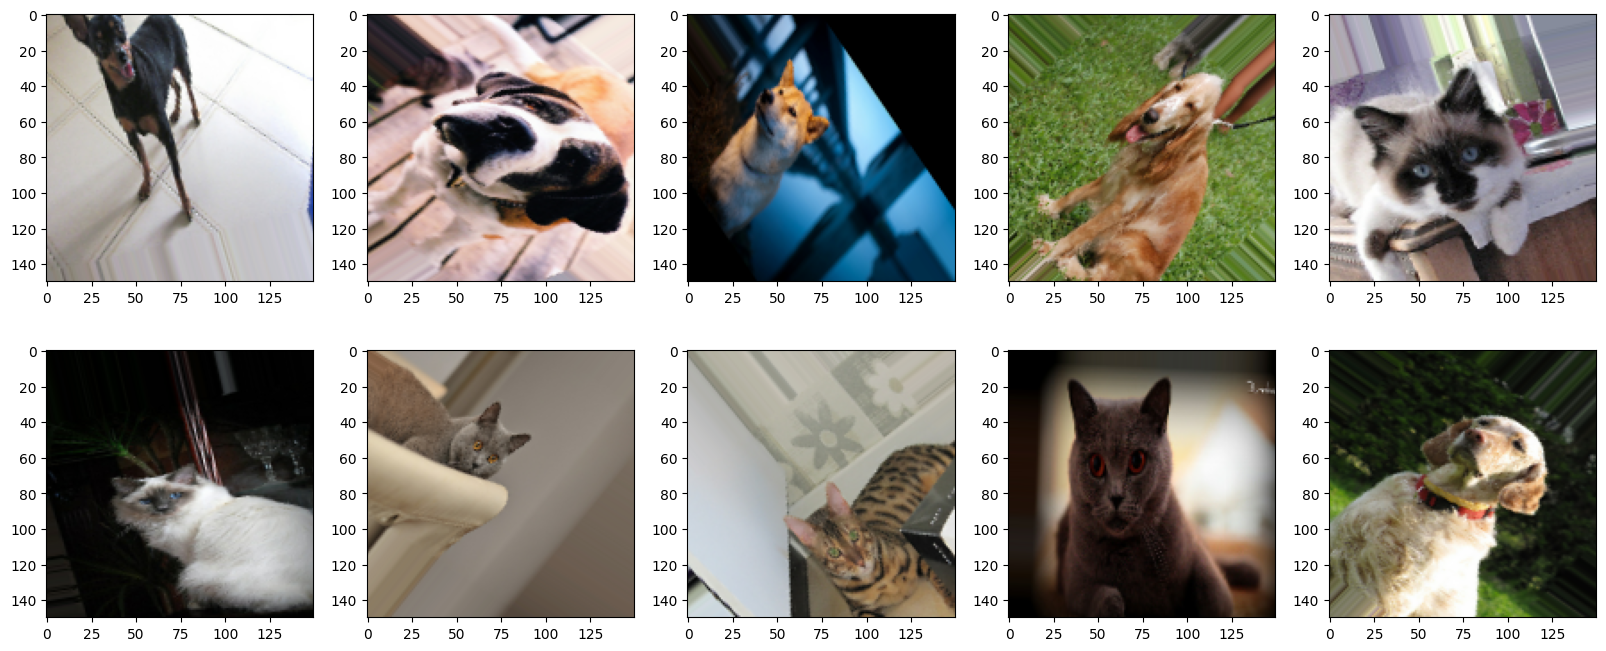

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

if(numpyy):
    datagen = ImageDataGenerator(
    rotation_range=50,      
    width_shift_range=0.2,  
    height_shift_range=0.1, 
    zoom_range=0.2,         
    horizontal_flip=True,   
    fill_mode='nearest'     
)

    datasetslist = [entrenamiento_ds,test_ds,validacion_ds]
    datagen.fit(x_train)

    mplt.figure(figsize=(20,8))

    for img,m in datagen.flow(x_train,y_train,batch_size=10,shuffle = False):
        for i in range(10):
            mplt.subplot(2,5,i+1)
            mplt.imshow(img[i])
        break
    
    






In [ ]:
if(numpyy):
    entrenamiento_numpy= datagen.flow(
        x_train,
        y_train,
        batch_size=32
    )

**Using tf.data dataset**

In [ ]:
tf_data = True

def aumento(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.2)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    return image, label

if(tf_data):
    entrenamiento_ds = entrenamiento_ds.map(aumento)




### Batch and prefetch

In [ ]:
if(tf_data):
    entrenamiento_ds = entrenamiento_ds.batch(32).prefetch(tf.data.AUTOTUNE)
    test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)
    validacion_ds = validacion_ds.batch(32).prefetch(tf.data.AUTOTUNE)

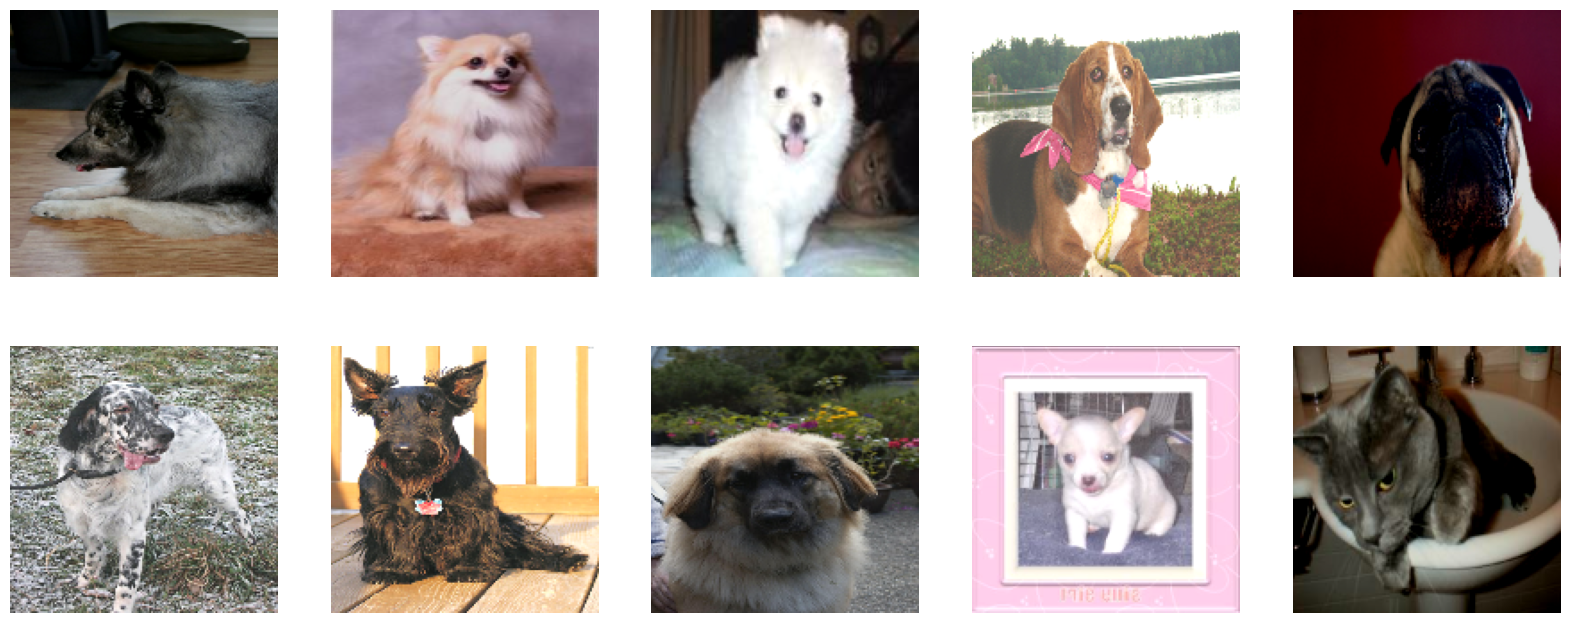

In [ ]:
if(tf_data):
    mplt.figure(figsize=(20,8))
    for images, labels in entrenamiento_ds.take(1):  
        for i in range(10):
            mplt.subplot(2, 5, i+1)
            mplt.imshow(images[i])  
            mplt.axis('off')
        mplt.show()

## Baseline Model

- Using Flatten; since the input is RGB, the shape remains [t, t, 3] where t is the size.
- As a baseline, it uses only two dense layers of 128 neurons with ReLU activation for faster training and compilation.
- The last layer has the same number of neurons as classes and uses softmax activation because it is multiclass.
- Categorical crossentropy is used because labels were converted to one-hot.

In [49]:
base_Model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(t,t,3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_clases, activation='softmax')
    ]
)

base_Model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

base_Model.summary()

c:\Users\sasup\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     8,640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 37)             │         4,773 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,661,413 (33.04 MB)

 Trainable params: 8,661,413 (33.04 MB)

 Non-trainable params: 0 (0.00 B)

**Architecture**
- Input layer: image shape (t, t, 3)
- Flatten layer: convert the 3D image to a 1D vector (t*t*3)
- Dense layers 1 and 2: 128 neurons with ReLU activation
- Output layer: num_classes neurons with softmax activation
- Loss function: categorical crossentropy
- Optimizer: Adam
- Metric: accuracy

### Training

If using `entrenamiento_numpy`, set batch_size=32.

In [ ]:
history = base_Model.fit(entrenamiento_ds, epochs=100,validation_data=validacion_ds)

Epoch 1/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 28s 166ms/step - accuracy: 0.0260 - loss: 5.0477 - val_accuracy: 0.0263 - val_loss: 3.6111
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - accuracy: 0.0257 - loss: 3.6115 - val_accuracy: 0.0345 - val_loss: 3.6110
Epoch 3/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 25s 155ms/step - accuracy: 0.0257 - loss: 3.6105 - val_accuracy: 0.0236 - val_loss: 3.6113
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 25s 154ms/step - accuracy: 0.0251 - loss: 3.6103 - val_accuracy: 0.0200 - val_loss: 3.6102
Epoch 5/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 25s 154ms/step - accuracy: 0.0245 - loss: 3.6102 - val_accuracy: 0.0200 - val_loss: 3.6130
Epoch 6/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 26s 160ms/step - accuracy: 0.0284 - loss: 3.6101 - val_accuracy: 0.0381 - val_loss: 3.6122
Epoch 7/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 25s 154ms/step - accuracy: 0.0243 - loss: 3.6099 - val_accuracy: 0.0272 - val_loss: 3.6111
Epoch 8/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 25s 157ms/step - accuracy: 0.0270 -

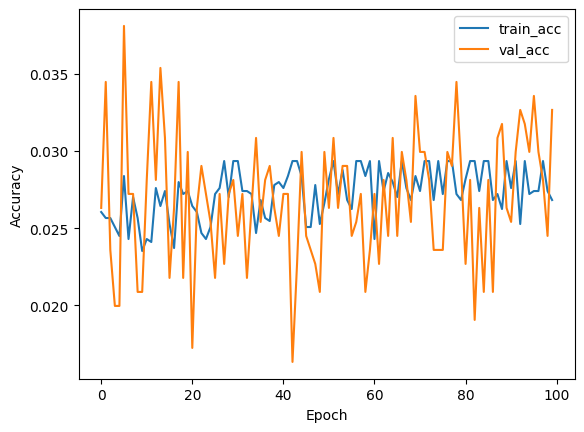

In [51]:
mplt.plot(history.history['accuracy'], label='train_acc')
mplt.plot(history.history['val_accuracy'], label='val_acc')
mplt.xlabel('Epoch')
mplt.ylabel('Accuracy')
mplt.legend()
mplt.show()


In [52]:
test_loss, test_acc = base_Model.evaluate(test_ds)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0245 - loss: 3.6133
Test loss: 3.6133196353912354
Test accuracy: 0.024500908330082893


#### Observed limitations

- Training accuracy: fluctuates around 2.4% - 2.9%
- Validation accuracy: fluctuates around 2.0% - 3.8%
- Test accuracy: 2.45%

These values indicate the model is random guessing.

- Training loss: converges to approximately 3.61
- Validation loss: remains stable around 3.61
- Test loss: 3.61

The loss decreases slightly during the first epochs and then stagnates, suggesting that the optimizer quickly reaches a flat minimum without real learning.

- **Poor generalization**
    Test accuracy remains at chance level, confirming that the model does not generalize beyond the training data.

- **Underfitting**
    Despite having a large number of parameters, the model fails to learn discriminative features.

- **No spatial feature extraction**
    Flattening the image destroys spatial relationships between pixels, preventing the model from learning edges, textures, or shapes.

## CNN

**Architectural Decisions**

**Convolutional Layers and Filter Sizes**

The network uses three convolutional layers with 32, 64, and 128 filters, respectively.

- The gradual increase in filters allows the model to learn increasingly complex features as spatial resolution decreases.
- This configuration provides sufficient representational capacity while avoiding unnecessary architectural complexity and overfitting.

---

**Kernel Size**

All convolutional layers use 3x3 kernels.

- Small kernels efficiently capture local spatial patterns.
- Stacking 3x3 convolutions increases the receptive field with fewer parameters than larger kernels, improving efficiency and generalization.

---

**Activation Functions**

- **ReLU** is used in all convolutional and hidden dense layers to introduce non-linearity, mitigate vanishing gradients, and improve training efficiency.
- **Softmax** is used in the output layer to produce class probability distributions for multi-class classification.

---

**Pooling Strategy**

- MaxPooling2D (2x2) is applied after each convolutional layer.

This reduces spatial resolution, lowers computational cost, and introduces robustness to small spatial variations.

---

**Fully Connected Layers**

After feature extraction:

- A **Flatten** layer transforms feature maps into a one-dimensional representation.
- A **Dense layer with 100 neurons (ReLU)** combines high-level features.
- A **Softmax output layer** with `num_clases` neurons performs the final classification.

In [77]:
modeloCNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(t,t,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(num_clases, activation='softmax')

])

modeloCNN.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

modeloCNN.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │     3,699,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 37)             │         3,737 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,796,285 (14.48 MB)

 Trainable params: 3,796,285 (14.48 MB)

 Non-trainable params: 0 (0.00 B)

### Training

In [78]:
historyCNN = modeloCNN.fit(entrenamiento_ds, epochs=100,validation_data=validacion_ds)

Epoch 1/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 61s 340ms/step - accuracy: 0.0498 - loss: 3.5598 - val_accuracy: 0.0744 - val_loss: 3.3613
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 53s 314ms/step - accuracy: 0.1166 - loss: 3.2514 - val_accuracy: 0.1642 - val_loss: 3.0298
Epoch 3/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 52s 312ms/step - accuracy: 0.1699 - loss: 3.0085 - val_accuracy: 0.2514 - val_loss: 2.7486
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 52s 312ms/step - accuracy: 0.2296 - loss: 2.7942 - val_accuracy: 0.2931 - val_loss: 2.5850
Epoch 5/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 50s 299ms/step - accuracy: 0.2895 - loss: 2.5770 - val_accuracy: 0.3575 - val_loss: 2.3490
Epoch 6/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 48s 285ms/step - accuracy: 0.3367 - loss: 2.3660 - val_accuracy: 0.4256 - val_loss: 2.0889
Epoch 7/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 44s 262ms/step - accuracy: 0.4080 - loss: 2.1007 - val_accuracy: 0.4800 - val_loss: 1.8475
Epoch 8/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 44s 262ms/step - accuracy: 0.4574 -

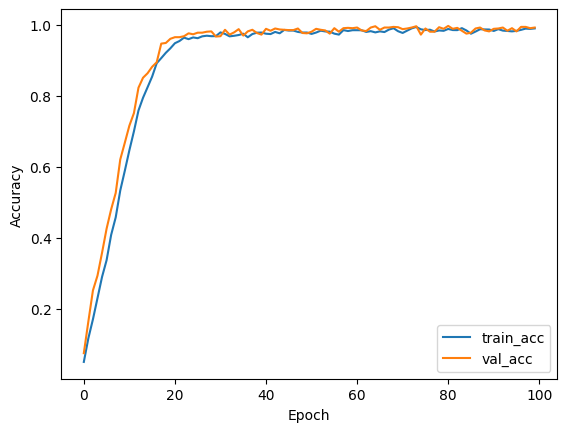

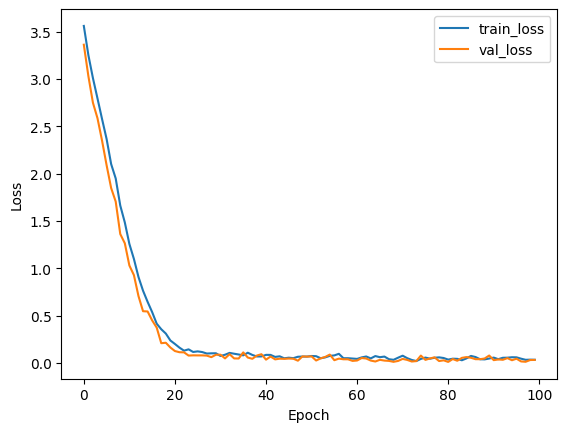

In [105]:
mplt.plot(historyCNN.history['accuracy'], label='train_acc')
mplt.plot(historyCNN.history['val_accuracy'], label='val_acc')
mplt.xlabel('Epoch')
mplt.ylabel('Accuracy')
mplt.legend()
mplt.show()

mplt.plot(historyCNN.history['loss'], label='train_loss')
mplt.plot(historyCNN.history['val_loss'], label='val_loss')
mplt.xlabel('Epoch')
mplt.ylabel('Loss')
mplt.legend()
mplt.show()

In [81]:
test_loss, test_acc = modeloCNN.evaluate(test_ds)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9828 - loss: 0.0517
Test loss: 0.051651693880558014
Test accuracy: 0.982758641242981


In [103]:
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = modeloCNN.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(labels.numpy(), axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [104]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(y_true, y_pred))

print("F1 macro:", f1_score(y_true, y_pred, average="macro"))
print("F1 weighted:", f1_score(y_true, y_pred, average="weighted"))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        26
           4       0.97      1.00      0.99        34
           5       1.00      0.97      0.98        29
           6       0.93      1.00      0.97        28
           7       1.00      1.00      1.00        33
           8       0.92      1.00      0.96        36
           9       0.96      1.00      0.98        26
          10       0.91      1.00      0.95        21
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        30
          13       1.00      0.94      0.97        31
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        29
          16       1.00      0.91      0.95        32
          17       1.00    

## Controlled Experiments

In [99]:
modeloCNN_Experimento = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(5,5),activation='relu',input_shape=(t,t,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(5,5),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(5,5),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(num_clases, activation='softmax')

])

modeloCNN_Experimento.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

modeloCNN_Experimento.summary()

c:\Users\sasup\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 146, 146, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 69, 69, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 30, 30, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │     2,880,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 37)             │         3,737 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,142,461 (11.99 MB)

 Trainable params: 3,142,461 (11.99 MB)

 Non-trainable params: 0 (0.00 B)

In [106]:
historyCNN_Experimento = modeloCNN_Experimento.fit(entrenamiento_ds, epochs=100,validation_data=validacion_ds)

Epoch 1/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 65s 354ms/step - accuracy: 0.0410 - loss: 3.6037 - val_accuracy: 0.0608 - val_loss: 3.5676
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 59s 353ms/step - accuracy: 0.0618 - loss: 3.5309 - val_accuracy: 0.0817 - val_loss: 3.3971
Epoch 3/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 57s 343ms/step - accuracy: 0.0935 - loss: 3.3818 - val_accuracy: 0.1162 - val_loss: 3.2519
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 60s 362ms/step - accuracy: 0.1176 - loss: 3.2553 - val_accuracy: 0.1697 - val_loss: 3.0541
Epoch 5/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 62s 369ms/step - accuracy: 0.1487 - loss: 3.0996 - val_accuracy: 0.1624 - val_loss: 2.9740
Epoch 6/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 58s 347ms/step - accuracy: 0.1977 - loss: 2.9368 - val_accuracy: 0.2296 - val_loss: 2.7962
Epoch 7/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 58s 347ms/step - accuracy: 0.2589 - loss: 2.7211 - val_accuracy: 0.3539 - val_loss: 2.4393
Epoch 8/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 59s 353ms/step - accuracy: 0.3192 -

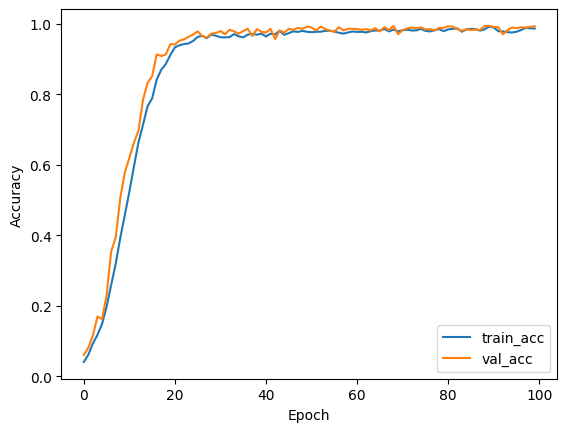

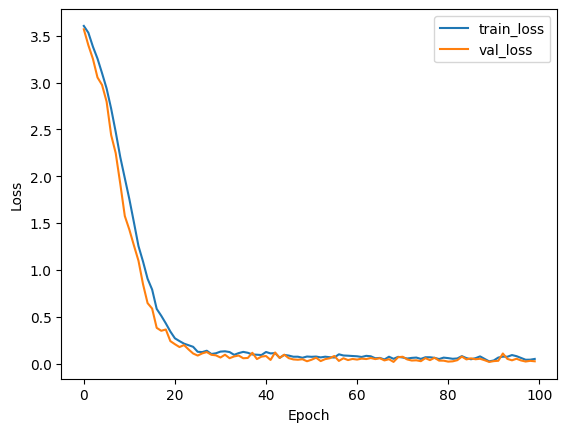

In [107]:
mplt.plot(historyCNN_Experimento.history['accuracy'], label='train_acc')
mplt.plot(historyCNN_Experimento.history['val_accuracy'], label='val_acc')
mplt.xlabel('Epoch')
mplt.ylabel('Accuracy')
mplt.legend()
mplt.show()

mplt.plot(historyCNN_Experimento.history['loss'], label='train_loss')
mplt.plot(historyCNN_Experimento    .history['val_loss'], label='val_loss')
mplt.xlabel('Epoch')
mplt.ylabel('Loss')
mplt.legend()
mplt.show()

In [108]:
test_loss_exp, test_acc_exp = modeloCNN.evaluate(test_ds)
print("Test loss:", test_loss_exp)
print("Test accuracy:", test_acc_exp)


35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9864 - loss: 0.0586
Test loss: 0.05858408659696579
Test accuracy: 0.9863883852958679


### Controlled Experiments on the Convolutional Layer

**Aspect chosen:** kernel size (3x3 vs 5x5), keeping everything else fixed.

**Experiment design**

- Base model: 3 Conv2D layers with 3x3 kernels and MaxPooling 2x2, everything else the same.
- Experiment: 3 Conv2D layers with 5x5 kernels and MaxPooling 2x2, everything else the same.
- Same hyperparameters, same data, same splits.

**Quantitative results**

| Configuration | Acc. train (final) | Loss train (final) | Acc. test | Loss test |
|---|---:|---:|---:|---:|
| 3x3 (base) | 0.9828 | 0.0517 | 0.9828 | 0.0517 |
| 5x5 (experiment) | 0.9864 | 0.0586 | 0.9864 | 0.0586 |

**Qualitative observations**

- With 5x5 kernels, the model can capture larger patterns earlier, but each layer has more parameters.
- With 3x3 kernels, the network builds complex patterns gradually, which often helps generalization.
- In the training plots, check whether 5x5 converges faster, but with higher overfitting risk.

**Trade-offs (performance vs complexity)**

- 5x5 increases computational and memory cost per layer.
- 3x3 is usually more efficient and stable, with a good balance of capacity and generalization.
- If 5x5 does not improve validation or test results, the extra cost is not justified.

---

### Interpretation and Architectural Reasoning

**Why did convolutional layers outperform (or not) the baseline?**

- Unlike the baseline with direct Flatten, convolutions preserve spatial structure and learn local filters (edges, textures, shapes).
- This yields more robust and discriminative representations for images, which usually improves accuracy and reduces loss.

**What inductive bias does convolution introduce?**

- Locality: useful patterns are assumed to be local.
- Translation equivariance: the same filter detects a pattern at any position.
- Parameter sharing: the same kernel is applied across the map, reducing complexity and improving generalization.

**In what problems would convolution not be appropriate?**

- Data without local spatial structure (for example, tables with independent variables).
- Problems where absolute position is critical and equivariance is not desired (for example, tasks that depend on a fixed location).
- Data with dominant global relationships where full attention or sequence models are more suitable.